In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

import unireps
import torch
import datasets
import matplotlib.pyplot as plt

project_dir = '/Users/christopher/Documents/unireps'
# project_dir = '/net/scratch2/chriswolfram/unireps'
unireps.set_hf_cache_directory(os.path.join(project_dir, 'hf_cache'))
unireps.set_datasets_directory(os.path.join(project_dir, 'datasets'))
unireps.set_outputs_directory(os.path.join(project_dir, 'outputs'))

datasets.disable_caching()

### Models

In [2]:
model_names = [
    "openai-community/gpt2",
    "google/gemma-2b",
    "google/gemma-7b",
    "google/gemma-2-2b",
    "google/gemma-2-9b",
    "google/gemma-2-9b-it",
    "google/gemma-2-27b",
    "meta-llama/Meta-Llama-3.1-8B",
    "meta-llama/Meta-Llama-3.1-8B-Instruct",
    "meta-llama/Llama-3.2-1B",
    "meta-llama/Llama-3.2-3B",
    "meta-llama/Llama-3.2-3B-Instruct",
    "meta-llama/Llama-3.2-11B-Vision",
    "mistralai/Mistral-7B-v0.3",
    "mistralai/Mistral-Nemo-Base-2407",
    "mistralai/Mixtral-8x7B-v0.1",
    "microsoft/Phi-3-mini-4k-instruct",
    "microsoft/Phi-3-medium-4k-instruct",
    "microsoft/Phi-3.5-mini-instruct",
    "tiiuae/falcon-40b",
    "tiiuae/falcon-11B",
    "meta-llama/Llama-3.1-70B",
    "meta-llama/Llama-3.1-70B-Instruct",
    "meta-llama/Llama-3.3-70B-Instruct",
    "tiiuae/falcon-mamba-7b"
]

chat_models = [
    "google/gemma-2-9b-it",
    "meta-llama/Meta-Llama-3.1-8B-Instruct",
    "meta-llama/Llama-3.2-3B-Instruct",
    "microsoft/Phi-3-mini-4k-instruct",
    "microsoft/Phi-3-medium-4k-instruct",
    "microsoft/Phi-3.5-mini-instruct",
    "meta-llama/Llama-3.1-70B-Instruct",
    "meta-llama/Llama-3.3-70B-Instruct"
]

dataset_names = [
    "web_text",
    "web_text_caesar",
    "imdb",
    "random_strings",
    "book_translations_en",
    "book_translations_de",
    "common_words"
]

### Layer similarity matrices

In [3]:
def model_dataset_knn(model, dataset, use_chat_template=False, normalize=True, agg='last', k=10, n=1024):
    ds = unireps.get_dataset(model, dataset, use_chat_template=use_chat_template).take(n)
    knn = unireps.embs_knn(unireps.dataset_embs(ds, layer=None, agg=agg, normalize=normalize), k=k)
    return knn

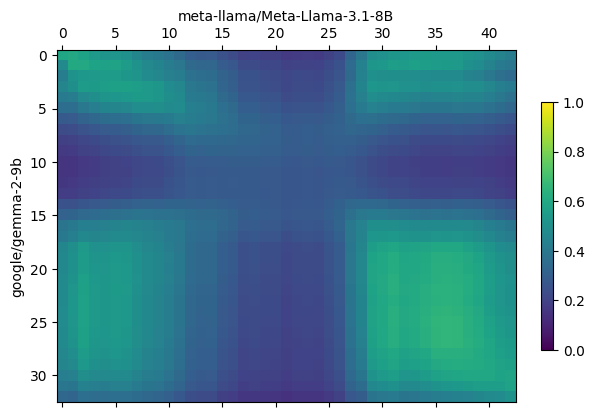

In [19]:
knn_1 = model_dataset_knn("meta-llama/Meta-Llama-3.1-8B", "random_strings")
knn_2 = model_dataset_knn("google/gemma-2-9b", "random_strings")
mknn = unireps.mutual_knn(knn_1, knn_2)
unireps.layer_by_layer_plot(mknn, model_1="google/gemma-2-9b", model_2="meta-llama/Meta-Llama-3.1-8B")
plt.show()

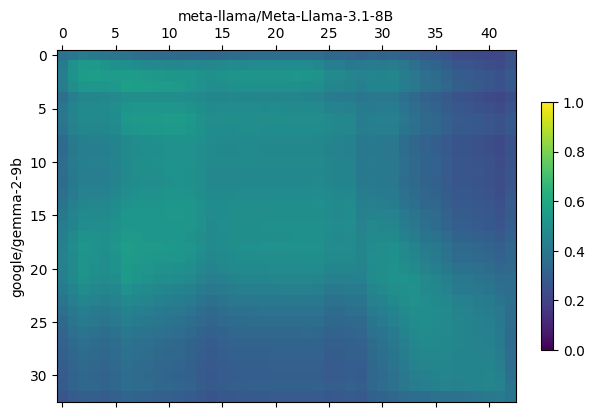

In [18]:
knn_1 = model_dataset_knn("meta-llama/Meta-Llama-3.1-8B", "common_words")
knn_2 = model_dataset_knn("google/gemma-2-9b", "common_words")
mknn = unireps.mutual_knn(knn_1, knn_2)
unireps.layer_by_layer_plot(mknn, model_1="google/gemma-2-9b", model_2="meta-llama/Meta-Llama-3.1-8B")
plt.show()

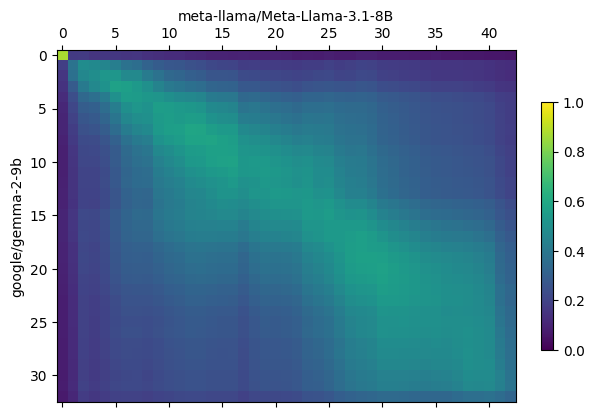

In [15]:
knn_1 = model_dataset_knn("meta-llama/Meta-Llama-3.1-8B", "web_text")
knn_2 = model_dataset_knn("google/gemma-2-9b", "web_text")
mknn = unireps.mutual_knn(knn_1, knn_2)
unireps.layer_by_layer_plot(mknn, model_1="google/gemma-2-9b", model_2="meta-llama/Meta-Llama-3.1-8B")
plt.show()

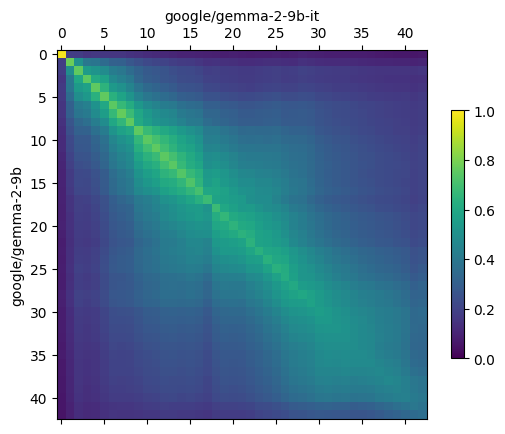

In [16]:
knn_1 = model_dataset_knn("google/gemma-2-9b", "web_text")
knn_2 = model_dataset_knn("google/gemma-2-9b-it", "web_text")
mknn = unireps.mutual_knn(knn_1, knn_2)
unireps.layer_by_layer_plot(mknn, model_1="google/gemma-2-9b", model_2="google/gemma-2-9b-it")
plt.show()

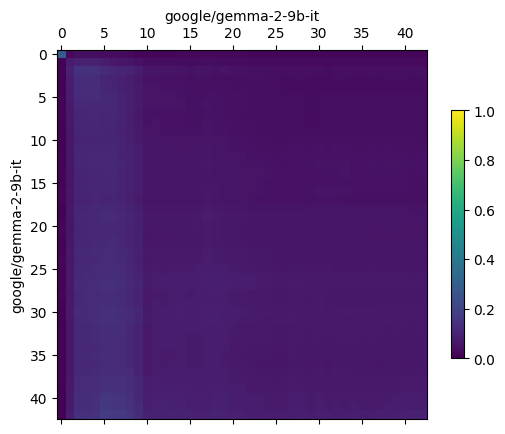

In [17]:
knn_1 = model_dataset_knn("google/gemma-2-9b-it", "web_text")
knn_2 = model_dataset_knn("google/gemma-2-9b-it", "web_text", use_chat_template=True)
mknn = unireps.mutual_knn(knn_1, knn_2)
unireps.layer_by_layer_plot(mknn, model_1="google/gemma-2-9b-it", model_2="google/gemma-2-9b-it")
plt.show()

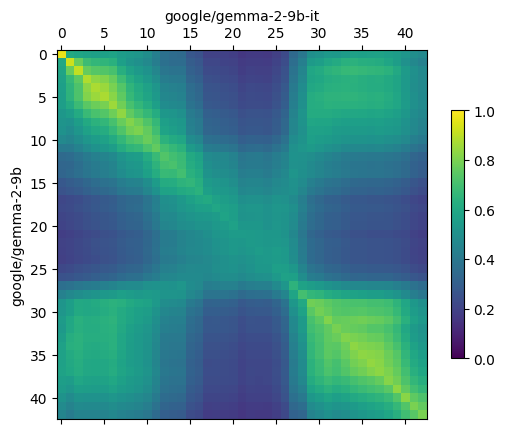

In [20]:
knn_1 = model_dataset_knn("google/gemma-2-9b", "random_strings")
knn_2 = model_dataset_knn("google/gemma-2-9b-it", "random_strings")
mknn = unireps.mutual_knn(knn_1, knn_2)
unireps.layer_by_layer_plot(mknn, model_1="google/gemma-2-9b", model_2="google/gemma-2-9b-it")
plt.show()

In [ ]:
def rv(emb_1, emb_2):
    

In [ ]:
knn_1 = model_dataset_knn("google/gemma-2-9b", "web_text")
knn_2 = model_dataset_knn("google/gemma-2-9b-it", "web_text")
mknn = unireps.mutual_knn(knn_1, knn_2)
unireps.layer_by_layer_plot(mknn, model_1="google/gemma-2-9b", model_2="google/gemma-2-9b-it")
plt.show()

## Scratch space

In [3]:
model_names

['openai-community/gpt2',
 'google/gemma-2b',
 'google/gemma-7b',
 'google/gemma-2-2b',
 'google/gemma-2-9b',
 'google/gemma-2-9b-it',
 'google/gemma-2-27b',
 'meta-llama/Meta-Llama-3.1-8B',
 'meta-llama/Meta-Llama-3.1-8B-Instruct',
 'meta-llama/Llama-3.2-1B',
 'meta-llama/Llama-3.2-3B',
 'meta-llama/Llama-3.2-3B-Instruct',
 'meta-llama/Llama-3.2-11B-Vision',
 'mistralai/Mistral-7B-v0.3',
 'mistralai/Mistral-Nemo-Base-2407',
 'mistralai/Mixtral-8x7B-v0.1',
 'microsoft/Phi-3-mini-4k-instruct',
 'microsoft/Phi-3-medium-4k-instruct',
 'microsoft/Phi-3.5-mini-instruct',
 'tiiuae/falcon-40b',
 'tiiuae/falcon-11B',
 'meta-llama/Llama-3.1-70B',
 'meta-llama/Llama-3.1-70B-Instruct',
 'meta-llama/Llama-3.3-70B-Instruct',
 'tiiuae/falcon-mamba-7b']

In [6]:
model_dataset_knn("google/gemma-2-9b-it", "web_text")

tensor([[[ 941,  852,  671,  ...,    1,    4,    5],
         [   8,    4,   13,  ...,   19,   17,   12],
         [ 909,  135,  732,  ...,  391,  234,  769],
         ...,
         [   8,    4,    1,  ...,   18,   15,   12],
         [   8,    4,    1,  ...,   18,   15,   12],
         [   8,    4,    1,  ...,   18,   15,   12]],

        [[ 912,   27,  868,  ...,  320,  517,   48],
         [ 612,  931,  673,  ...,  961,  873,  387],
         [ 854,  334,  329,  ...,   97,  249,  337],
         ...,
         [ 963,  533,  795,  ...,  961,  305,  885],
         [  44,  258,  448,  ...,  637,  268,  102],
         [ 274,  635,  856,  ...,  667,  838,  273]],

        [[ 360,  962,  379,  ...,  428,  955,  357],
         [ 931,  673,  387,  ...,  509,  890,  612],
         [ 854,  329,  334,  ...,  541,   87,  561],
         ...,
         [ 963,  893,  305,  ...,  287,  873,  961],
         [  44,  690,  258,  ...,  932,  253,  448],
         [ 274,  382,  265,  ...,  635,  507,  525]],

In [ ]:
unireps.mutual_knn_layer_plot('google/gemma-2-9b', )

In [11]:
unireps.dataset_embs(unireps.get_dataset('google/gemma-2-9b', 'web_text'), layer=None).flatten().shape[0]

315621376

In [10]:
unireps.dataset_embs(unireps.get_dataset('google/gemma-2-9b', 'web_text'), layer=None).dtype

torch.float32

In [6]:
unireps.get_dataset('google/gemma-2-9b', 'web_text')['at_max_length'].sum()

tensor(0)

In [3]:
ds1 = unireps.get_dataset('google/gemma-2-9b', 'web_text')
knn_1 = unireps.embs_knn(unireps.dataset_embs(ds1), k=10)

In [4]:
ds2 = unireps.get_dataset('meta-llama/Meta-Llama-3.1-8B', 'web_text')
knn_2 = unireps.embs_knn(unireps.dataset_embs(ds2), k=10)

In [5]:
unireps.mutual_knn(knn_1[10], knn_2[8])

0.513134777545929

In [9]:
unireps.mutual_knn(knn_1, knn_2[8])

tensor([0.0831, 0.1569, 0.2169, 0.2207, 0.2527, 0.2982, 0.3617, 0.3904, 0.4087,
        0.4865, 0.5131, 0.5304, 0.5674, 0.5695, 0.5682, 0.5576, 0.5491, 0.4960,
        0.4822, 0.4681, 0.4539, 0.4306, 0.4163, 0.4173, 0.4065, 0.4018, 0.3722,
        0.3597, 0.3581, 0.3388, 0.3110, 0.2991, 0.2825, 0.2692, 0.2590, 0.2489,
        0.2453, 0.2361, 0.2302, 0.2268, 0.2138, 0.1868, 0.1689])

In [12]:
unireps.mutual_knn(knn_1[10], knn_2)

tensor([0.1092, 0.2494, 0.3223, 0.3869, 0.4757, 0.5337, 0.5438, 0.5401, 0.5131,
        0.4736, 0.4534, 0.4272, 0.4141, 0.3963, 0.3869, 0.3910, 0.3804, 0.3634,
        0.3356, 0.3242, 0.3117, 0.2981, 0.2833, 0.2706, 0.2563, 0.2474, 0.2460,
        0.2348, 0.2316, 0.2263, 0.2199, 0.2164, 0.1877])

In [15]:
a = unireps.mutual_knn(knn_1, knn_2)
a

tensor([[0.8828, 0.1515, 0.1325,  ..., 0.0655, 0.0663, 0.0607],
        [0.1518, 0.3474, 0.3457,  ..., 0.1095, 0.1116, 0.1003],
        [0.1511, 0.4600, 0.4422,  ..., 0.1699, 0.1732, 0.1602],
        ...,
        [0.0558, 0.1285, 0.1358,  ..., 0.4652, 0.4524, 0.3684],
        [0.0531, 0.1179, 0.1220,  ..., 0.4315, 0.4288, 0.3586],
        [0.0484, 0.1097, 0.1110,  ..., 0.3744, 0.3758, 0.3248]])

In [16]:
a[10,8]

tensor(0.5131)

In [2]:
embs_1 = unireps.dataset_embs(unireps.get_dataset('google/gemma-2-9b', 'web_text'), layer=None)

In [3]:
knn = unireps.embs_knn(embs_1, k=10)

In [5]:
knn_1 = unireps.embs_knn(embs_1[0], k=10)

In [10]:
knn[0] == knn_1

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

In [4]:
knn.shape

torch.Size([43, 2048, 10])

In [6]:
knn_1.shape

torch.Size([2048, 10])

In [7]:
embs_1.shape

torch.Size([43, 2048, 3584])

In [14]:
knn.dim()

3

In [11]:
emb_2 = unireps.dataset_embs(ds2)

NameError: name 'ds2' is not defined

In [ ]:
knn_2 = unireps.embs_knn(unireps.dataset_embs(ds2), k=10)

In [27]:
ds1 = unireps.get_dataset('google/gemma-2-9b', 'web_text')
emb_1 = unireps.dataset_embs(ds1)

In [28]:
emb_1 = unireps.dataset_embs(ds1)

In [35]:
emb_1[0] @ emb_1[0].T

tensor([[ 1.0000,  0.2438,  0.0247,  ...,  0.1147,  0.2438,  0.1630],
        [ 0.2438,  1.0000, -0.1881,  ..., -0.0142,  1.0000,  0.5315],
        [ 0.0247, -0.1881,  1.0000,  ...,  0.2875, -0.1881, -0.0791],
        ...,
        [ 0.1147, -0.0142,  0.2875,  ...,  1.0000, -0.0142,  0.0527],
        [ 0.2438,  1.0000, -0.1881,  ..., -0.0142,  1.0000,  0.5315],
        [ 0.1630,  0.5315, -0.0791,  ...,  0.0527,  0.5315,  1.0000]])

In [31]:
unireps.embs_knn(emb_1, k=10)

tensor([[[1793, 1326, 2023,  ..., 1980,  852,  671],
         [  44,   36,   48,  ...,   43,   35,   32],
         [1029, 1998,  909,  ...,  732, 1691,  391],
         ...,
         [1582, 1706, 1677,  ...,  391, 1729, 1691],
         [   5,    4,   15,  ...,   17,   13,    3],
         [ 574,  328,  604,  ...,  573,  396,  324]],

        [[1793, 1326, 2023,  ..., 1689, 1323, 1707],
         [1869,  673,  931,  ...,  448,  765, 1817],
         [ 731,  337,  939,  ..., 1726, 1390, 1643],
         ...,
         [1932,  271, 1884,  ..., 1563,  211, 1342],
         [ 491,  458, 1278,  ..., 1432, 1752, 1133],
         [1295,  604,  215,  ...,  574,  328, 1739]],

        [[1793, 1160, 1257,  ...,  912, 1258, 1252],
         [1581,  673, 1824,  ...,  753,  832,  993],
         [ 854, 1029,  329,  ..., 1102, 1368, 1165],
         ...,
         [1884, 1932,  271,  ...,   16, 1691, 1141],
         [ 491, 1432, 1752,  ..., 1133,  181,  425],
         [1295,  396,  604,  ..., 1925,  328,  574]],

In [16]:
knn_1 = unireps.embs_knn(emb_1, k=10)

In [9]:
knn_1 = model_dataset_knn("google/gemma-2-9b", "web_text")
knn_2 = model_dataset_knn("google/gemma-2-9b-it", "web_text")

In [10]:
mknn = unireps.mutual_knn(knn_1, knn_2)

In [37]:
ds1 = unireps.get_dataset('google/gemma-2-9b', 'web_text')
emb_1 = unireps.dataset_embs(ds1)

ds2 = unireps.get_dataset('google/gemma-2-9b-it', 'web_text')
emb_2 = unireps.dataset_embs(ds2)

In [6]:
def rv(x, y):
    gramX = x @ x.T
    gramY = y @ y.T
    
    return torch.linalg.matrix_norm(gramX.T @ gramY)**2 / (torch.linalg.matrix_norm(gramX.T @ gramX) * torch.linalg.matrix_norm(gramY.T @ gramY))

In [7]:
from tqdm import tqdm

In [53]:
rvs = torch.zeros(len(emb_1), len(emb_2))
for i, x in enumerate(tqdm(emb_1)):
    for j, y in enumerate(emb_2):
        rvs[i, j] = rv(x, y)

100%|██████████| 43/43 [04:03<00:00,  5.66s/it]


In [54]:
rvs

tensor([[1.0005, 0.9734, 0.9702,  ..., 0.8192, 0.8080, 0.8245],
        [0.9724, 0.9998, 0.9977,  ..., 0.9041, 0.8945, 0.9065],
        [0.9717, 0.9981, 0.9997,  ..., 0.8989, 0.8884, 0.9032],
        ...,
        [0.8271, 0.8972, 0.8979,  ..., 0.9964, 0.9947, 0.9819],
        [0.8103, 0.8818, 0.8817,  ..., 0.9951, 0.9961, 0.9814],
        [0.8397, 0.9048, 0.9073,  ..., 0.9557, 0.9483, 0.9630]])

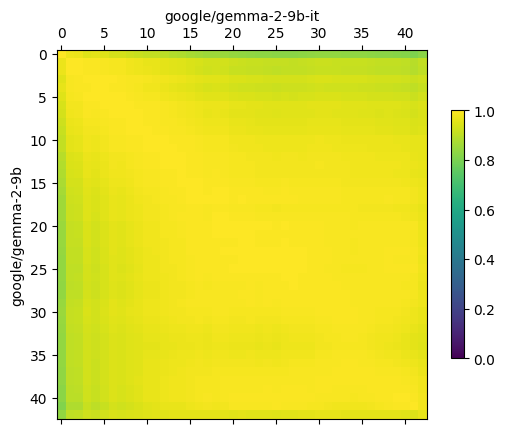

In [59]:
unireps.layer_by_layer_plot(rvs, model_1="google/gemma-2-9b", model_2="google/gemma-2-9b-it")
plt.show()

In [5]:
ds1 = unireps.get_dataset('google/gemma-2-9b', 'web_text')
emb_1 = unireps.dataset_embs(ds1)

ds2 = unireps.get_dataset("meta-llama/Meta-Llama-3.1-8B", 'web_text')
emb_2 = unireps.dataset_embs(ds2)

In [8]:
rvs = torch.zeros(len(emb_1), len(emb_2))
for i, x in enumerate(tqdm(emb_1)):
    for j, y in enumerate(emb_2):
        rvs[i, j] = rv(x, y)

100%|██████████| 43/43 [04:17<00:00,  5.99s/it]


In [38]:
self_ckas = torch.zeros(len(emb_2), len(emb_2))
for i, x in enumerate(tqdm(emb_2)):
    for j, y in enumerate(emb_2):
        self_ckas[i, j] = cka(x, y)

100%|██████████| 33/33 [05:40<00:00, 10.32s/it]


In [25]:
ckas = torch.zeros(len(emb_1), len(emb_2))
for i, x in enumerate(tqdm(emb_1)):
    for j, y in enumerate(emb_2):
        ckas[i, j] = cka(x, y)

100%|██████████| 43/43 [07:17<00:00, 10.18s/it]


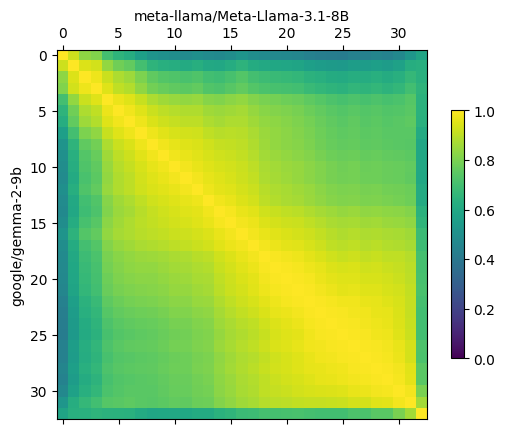

In [39]:
unireps.layer_by_layer_plot(self_ckas, model_1="google/gemma-2-9b", model_2="meta-llama/Meta-Llama-3.1-8B")
plt.show()

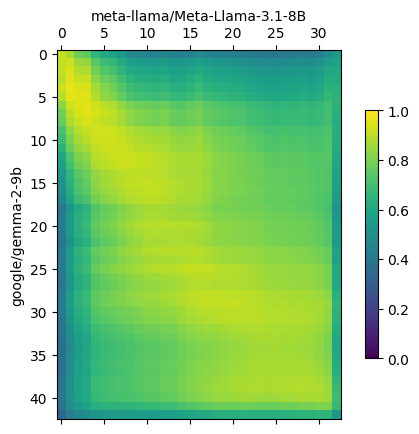

In [34]:
unireps.layer_by_layer_plot(ckas, model_1="google/gemma-2-9b", model_2="meta-llama/Meta-Llama-3.1-8B")
plt.show()

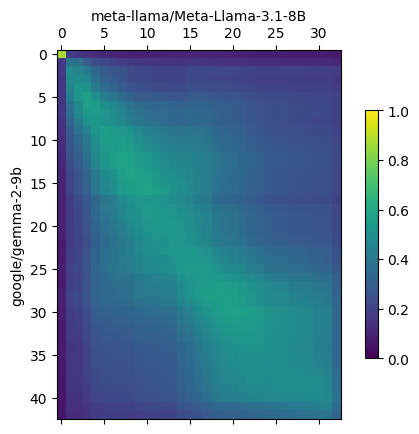

In [30]:
knn_1 = model_dataset_knn("meta-llama/Meta-Llama-3.1-8B", "web_text")
knn_2 = model_dataset_knn("google/gemma-2-9b", "web_text")
mknn = unireps.mutual_knn(knn_1, knn_2)
unireps.layer_by_layer_plot(mknn.T, model_1="google/gemma-2-9b", model_2="meta-llama/Meta-Llama-3.1-8B")
plt.show()

In [20]:
def cka(feats_A, feats_B, kernel_metric='ip', rbf_sigma=1.0, unbiased=False):
        """Computes the unbiased Centered Kernel Alignment (CKA) between features."""
        
        if kernel_metric == 'ip':
            # Compute kernel matrices for the linear case
            K = torch.mm(feats_A, feats_A.T)
            L = torch.mm(feats_B, feats_B.T)
        elif kernel_metric == 'rbf':
            # COMPUTES RBF KERNEL
            K = torch.exp(-torch.cdist(feats_A, feats_A) ** 2 / (2 * rbf_sigma ** 2))
            L = torch.exp(-torch.cdist(feats_B, feats_B) ** 2 / (2 * rbf_sigma ** 2))
        else:
            raise ValueError(f"Invalid kernel metric {kernel_metric}")

        # Compute HSIC values
        hsic_fn = hsic_unbiased if unbiased else hsic_biased
        hsic_kk = hsic_fn(K, K)
        hsic_ll = hsic_fn(L, L)
        hsic_kl = hsic_fn(K, L)

        # Compute CKA
        #print('hsic', hsic_kl)
        cka_value = hsic_kl / (torch.sqrt(hsic_kk * hsic_ll) + 1e-6)        
        return cka_value.item()

def hsic_biased(K, L):
    """ Compute the biased HSIC (the original CKA) """
    H = torch.eye(K.shape[0], dtype=K.dtype, device=K.device) - 1 / K.shape[0]
    return torch.trace(K @ H @ L @ H)

def hsic_unbiased(K, L):
    """
    Compute the unbiased Hilbert-Schmidt Independence Criterion (HSIC) as per Equation 5 in the paper.
    > Reference: https://jmlr.csail.mit.edu/papers/volume13/song12a/song12a.pdf
    """
    m = K.shape[0]

    # Zero out the diagonal elements of K and L
    K_tilde = K.clone().fill_diagonal_(0)
    L_tilde = L.clone().fill_diagonal_(0)

    # Compute HSIC using the formula in Equation 5
    HSIC_value = (
        (torch.sum(K_tilde * L_tilde.T))
        + (torch.sum(K_tilde) * torch.sum(L_tilde) / ((m - 1) * (m - 2)))
        - (2 * torch.sum(torch.mm(K_tilde, L_tilde)) / (m - 2))
    )

    HSIC_value /= m * (m - 3)
    return HSIC_value

In [9]:
mmlu = datasets.load_dataset('TIGER-Lab/MMLU-Pro', split='test')

README.md:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/4.15M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/45.3k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/12032 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/70 [00:00<?, ? examples/s]

In [13]:
mmlu

Dataset({
    features: ['question_id', 'question', 'options', 'answer', 'answer_index', 'cot_content', 'category', 'src'],
    num_rows: 12032
})

In [24]:
mmlu.shuffle(seed=1234)[0]

{'question_id': 4838,
 'question': "The significance of Frere's discovery was that what he found was located:",
 'options': ['inside a previously undiscovered pyramid.',
  'in the depths of the ocean, near the remains of a sunken ship.',
  'on a remote island, far from known human settlements.',
  'on the surface, above the remains of extinct animals.',
  'beneath the remains of extinct animals.',
  'in a region of Africa where no one thought humans had ever lived.',
  'on top of the ruins of a Medieval castle.',
  'in the heart of a bustling modern city, underneath a skyscraper.',
  'within the remnants of a prehistoric cave dwelling.',
  'in a place where only dinosaur fossils had been found.'],
 'answer': 'E',
 'answer_index': 4,
 'cot_content': '',
 'category': 'history',
 'src': 'ori_mmlu-prehistory'}

In [21]:
for t in mmlu.select_columns('question').rename_column('question', 'text').shuffle(seed=1234).take(2048)['text']:
    print(t)
    print("#####")

The significance of Frere's discovery was that what he found was located:
#####
In Bandura's social learning theory, the concept of seif-reinforcement is critical for explaining how in the absence of external reward
#####
The normal boiling point of water is 9720 cal/mole. Calculate the heat of vaporization at 35°C and 1 atm. Use thefollowing C_p values to solve the problem. C_p Values forH_2O(1); C_p = 18.06 cal deg^-1 mole^-1 (independentof temperature) forH_2O(g); C_p = 7.219 + 2.374(10^-3)T + 2.67(10^-7)T^2 caldeg^-1 mole^-1
#####
Mr. Patrick is preparing a five-question true-false quiz for his class. He flips a coin before writing the first question. If it is heads, he writes a true statement and if it is tails, he writes a false statement. He continues this until all five statements are written. What is the probability that the correct sequence of answers is TFTFT ? Express your answer as a common fraction.
#####
While driving to school, Elise hears about a concert ticket giveawa

In [28]:
model_dataset_knn("google/gemma-2-9b", "TIGER-Lab/MMLU-Pro")

Dataset({
    features: ['question_id', 'question', 'options', 'answer', 'answer_index', 'cot_content', 'category', 'src'],
    num_rows: 12032
})

In [68]:
ds = unireps.get_dataset('meta-llama/Llama-3.1-70B-Instruct', 'web_text', use_chat_template=False)

Loading dataset from disk:   0%|          | 0/22 [00:00<?, ?it/s]

In [69]:
embs = unireps.dataset_embs(ds, layer=None, agg='last', normalize=True)

In [31]:
knn = unireps.embs_knn(embs, k=10)

In [71]:
def knn_mat(emb_mat):
    gram = emb_mat @ emb_mat.T
    gram.fill_diagonal_(-torch.inf)
    nn = gram.argsort(descending=True)[:, :gram.shape[0]-1]
    return nn

In [85]:
datasets.Dataset.from_dict({'text': ds['text'], 'knn': torch.stack([knn_mat(e) for e in embs]).permute(1,0,2).to(torch.int16), 'at_max_length': ds['at_max_length']}).to_parquet('/Users/christopher/Downloads/test.parquet')

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

687028806

In [76]:
torch.stack([knn_mat(e) for e in embs]).permute(1,0,2).shape

torch.Size([2048, 81, 2047])

In [70]:
gram = emb_mat @ emb_mat.T
gram.fill_diagonal_(-torch.inf)
nn = gram.argsort(descending=True)[:, :gram.shape[0]-1]
nn.to(torch.int16)

tensor([[1793, 1421, 2005,  ...,  856,  143,  104],
        [ 673, 2040,  292,  ...,   20,  419, 1436],
        [ 854, 1879, 1026,  ..., 1722, 1955, 1904],
        ...,
        [1035,  507,  698,  ..., 1012,  633,  743],
        [1711,  647, 1058,  ..., 1582,  419, 1212],
        [1756,  604, 1198,  ..., 1582,  314, 1072]], dtype=torch.int16)

In [48]:
gram.topk(6, sorted=True).indices

tensor([[1793, 1421, 2005,  919,  780,  990],
        [ 673, 2040,  292, 1367,  138,  963],
        [ 854, 1879, 1026,  135, 1870, 1938],
        ...,
        [1035,  507,  698, 2022,  773, 1192],
        [1711,  647, 1058, 1519,  432,   63],
        [1756,  604, 1198,  574,  221,  774]])

In [51]:
gram.argsort(descending=True)

tensor([[1793, 1421, 2005,  ...,  143,  104,    0],
        [ 673, 2040,  292,  ...,  419, 1436,    1],
        [ 854, 1879, 1026,  ..., 1955, 1904,    2],
        ...,
        [1035,  507,  698,  ...,  633,  743, 2045],
        [1711,  647, 1058,  ...,  419, 1212, 2046],
        [1756,  604, 1198,  ...,  314, 1072, 2047]])